In [1]:
#Import the necessary libraries
import pandas as pd # Loading dataset
import numpy as np #Perform numerical calculations
import matplotlib.pyplot as plt #Python visualizations
import seaborn as sns #Statistical visualizations
from scipy import stats #Statistical inferencing
from statsmodels.stats.outliers_influence import variance_inflation_factor #Checking for multicollinearity
from statsmodels.tools.tools import add_constant #Adding y-intercept to our model
from statsmodels.formula.api import ols #Linear Regression
import statsmodels.api as sm #ANOVA/ F-Statistic
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler #Preprocessing data before ML
from sklearn.model_selection import train_test_split, GridSearchCV #split our data, get the best model parameters
from sklearn.linear_model import LinearRegression, Ridge, Lasso #Linear Regression
from sklearn.tree import DecisionTreeRegressor #Tree model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor #Ensembling model
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score #Model evaluators
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
# Correct imports - note the capitalization
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data= pd.read_csv('/Users/josephmutui/Desktop/LuxDev/Python-class/crypto-classifier/data/processed/crypto_labeled_data.csv')


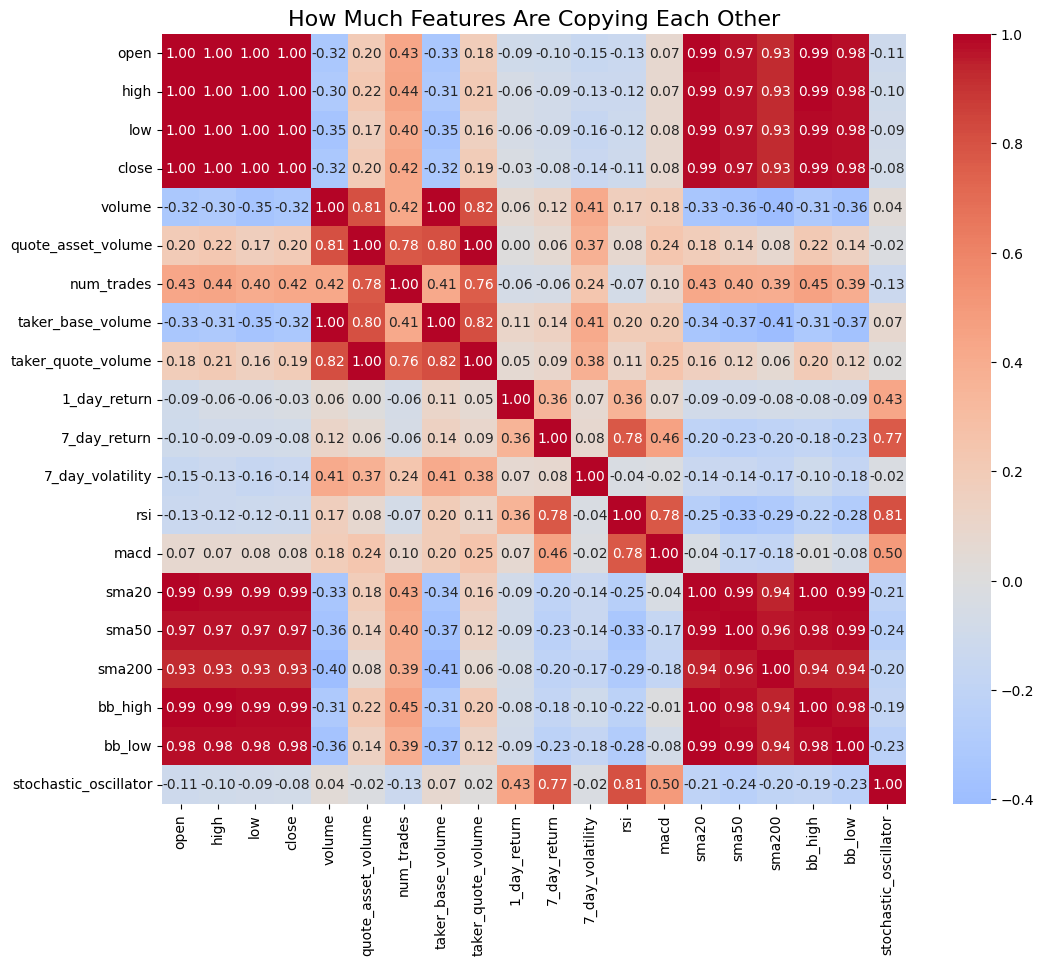


FEATURES THAT ARE BASICALLY THE SAME (correlation > 0.95):
open is almost identical to: ['high', 'low', 'close', 'sma20', 'sma50', 'bb_high', 'bb_low']
high is almost identical to: ['open', 'low', 'close', 'sma20', 'sma50', 'bb_high', 'bb_low']
low is almost identical to: ['open', 'high', 'close', 'sma20', 'sma50', 'bb_high', 'bb_low']
close is almost identical to: ['open', 'high', 'low', 'sma20', 'sma50', 'bb_high', 'bb_low']
volume is almost identical to: ['taker_base_volume']
quote_asset_volume is almost identical to: ['taker_quote_volume']
taker_base_volume is almost identical to: ['volume']
taker_quote_volume is almost identical to: ['quote_asset_volume']
sma20 is almost identical to: ['open', 'high', 'low', 'close', 'sma50', 'bb_high', 'bb_low']
sma50 is almost identical to: ['open', 'high', 'low', 'close', 'sma20', 'sma200', 'bb_high', 'bb_low']
sma200 is almost identical to: ['sma50']
bb_high is almost identical to: ['open', 'high', 'low', 'close', 'sma20', 'sma50', 'bb_low']


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your BTC data

# 2. Remove columns that are NOT features (dates, labels, etc.)
# We only want the numbers the model uses to predict
data = data.drop(columns=['open_time', 'close_time', 'future_return', 'label', 'label_name'])

# 3. Check correlation — THIS IS THE MAGIC LINE
correlation = data.corr()

# 4. Show a beautiful color map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, 
            annot=True,          # shows the numbers
            cmap='coolwarm',     # red = high, blue = low
            center=0,            # 0 means no correlation
            fmt='.2f')           # show 2 decimal places
plt.title("How Much Features Are Copying Each Other", fontsize=16)
plt.show()

# 5. BONUS: Show only the strongest connections (> 0.95 means almost twins)
print("\nFEATURES THAT ARE BASICALLY THE SAME (correlation > 0.95):")
strong = (correlation.abs() > 0.95) & (correlation != 1.0)
for col in strong.columns:
    twins = strong.index[strong[col]].tolist()
    if twins:
        print(f"{col} is almost identical to: {twins}")

In [15]:
data= pd.read_csv('/Users/josephmutui/Desktop/LuxDev/Python-class/crypto-classifier/data/processed/crypto_labeled_data.csv')


YOUR FINAL RESULTS (2025 Real Performance)
Test Accuracy: 44.6%

              precision    recall  f1-score   support

        SELL       0.17      0.32      0.22        19
        HOLD       0.72      0.52      0.61        90
         BUY       0.05      0.08      0.06        12

    accuracy                           0.45       121
   macro avg       0.31      0.31      0.30       121
weighted avg       0.57      0.45      0.49       121



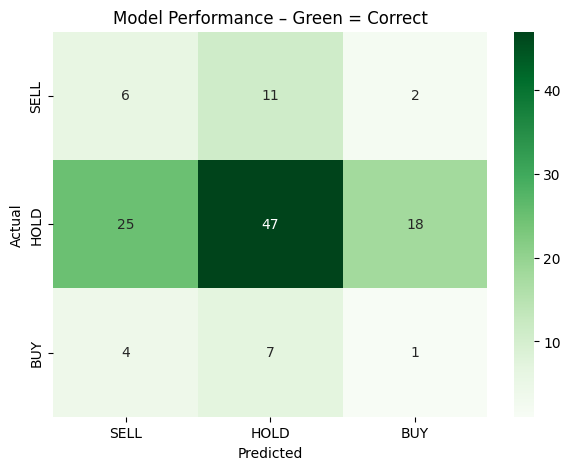

In [24]:
# FINAL BULLETPROOF VERSION — WORKS EVERYWHERE
import pandas as pd
from lightgbm import LGBMClassifier
import lightgbm as lgb          # ← this is the trick
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load & clean


# 2. Only the 7 golden features
X = data[['1_day_return', '7_day_return', '7_day_volatility',
        'rsi', 'macd', 'volume', 'stochastic_oscillator','sma20']]
y = data['label']

# 3. Time split
train_end = int(len(data) * 0.70)
val_end   = int(len(data) * 0.85)

X_train, X_val, X_test = X.iloc[:train_end], X.iloc[train_end:val_end], X.iloc[val_end:]
y_train, y_val, y_test = y.iloc[:train_end], y.iloc[train_end:val_end], y.iloc[val_end:]

# 4. Train — THIS WORKS ON EVERY LIGHTGBM VERSION
model = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    verbosity=-1                    # ← turns off all messages
)

model.fit(
    X_train, y_train
)

# 5. Results
pred = model.predict(X_test)

print("YOUR FINAL RESULTS (2025 Real Performance)")
print("===========================================")
print(f"Test Accuracy: {(pred == y_test).mean():.1%}\n")
print(classification_report(y_test, pred, target_names=['SELL', 'HOLD', 'BUY']))

# 6. Pretty picture
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['SELL','HOLD','BUY'],
            yticklabels=['SELL','HOLD','BUY'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Model Performance – Green = Correct')
plt.show()